# KMeans聚类
Kmeans需要提供参数为k(分为几类)和times(迭代多少次)。思路是：
* 1.在数据集中选择k个点作为类中心，并命名为第i类，i=1,..,k
* 2.计算其他样本离这k个点的距离，把离得最近的类中心的类作为自身的类
* 3.k个类内做一个类中心的计算（几何中心），更新类中心 
* 4.重复2，3，循环times次

注意这是个无监督学习
## 参考：
* 视频 https://www.bilibili.com/video/BV1V7411P7wL

## 数据预处理

In [2]:
import numpy as np
import pandas as pd 

In [3]:
data = pd.read_csv('\data\order.csv')
data.head()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [4]:
t = data.iloc[: , -8:]

## KMeans聚类函数

In [5]:
class KMeans:
    
    def __init__(self, k, times):
        self.k = k
        self.times = times
        
    def fit(self, X):
        X = np.asarray(X)
        np.random.seed(0)
        self.cluster_centers = X[np.random.randint(0, len(X), self.k)] #初始时随机选择k个样本点作为类中心点
        self.labels = np.zeros(len(X))
        
        for t in range(self.times):
            for index, x in enumerate(X):
                dis = np.sqrt(np.sum((x - self.cluster_centers) ** 2, axis=1))
                #把距离最小的索引赋值给标签数组，索引的值就是当前点所属的类别
                # dis.argmin()表示dis最小的那个self.cluster_centers的索引,第index个x就赋值给这个索引了
                #有点像是给了类别，但是这是无监督学习并没有类别一说
                self.labels[index] = dis.argmin() 
            for i in range(self.k):
                self.cluster_centers[i] = np.mean(X[self.labels == i], axis = 0)
    
    
    def predict(self, X):
        X = np.asarray(X)
        result = np.zeros(len(X))
        for index, x in enumerate(X):
            dis = np.sqrt(np.sum((x - self.cluster_centers)**2, axis =1))
            result[index] = dis.argmin()
        return result

## 训练预测可视化

In [6]:
kmeans = KMeans(3, 50)
kmeans.fit(t)

In [7]:
kmeans.cluster_centers

array([[46.33977936,  8.93380516, 23.19047005, 13.11741633,  4.8107557 ,
         1.17283735,  1.35704647,  0.95392773],
       [19.5308009 , 50.42856608, 14.70652695,  7.89437019,  3.69829234,
         0.91000428,  1.92515077,  0.82113238],
       [ 7.93541008,  4.56182052, 30.65583437, 18.57726789,  8.61597195,
         1.28482514, 26.81950293,  1.30158264]])

In [8]:
t[kmeans.labels == 0].head()

,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
15,48.23,20.37,15.38,8.29,7.73,0.0,0.0,0.0
23,24.10,22.29,38.69,14.92,0.00,0.0,0.0,0.0
24,36.51,31.93,27.18,4.38,0.00,0.0,0.0,0.0
40,22.76,0.00,0.00,77.24,0.00,0.0,0.0,0.0
43,65.64,12.36,21.99,0.00,0.00,0.0,0.0,0.0


In [9]:
kmeans.predict([[30,30,40,0,0,0,0,0], [10,10,10,10,10,10,10,30], [5,10,15,20,20,30,0,0]])

array([0., 2., 2.])

In [10]:
t2 = data.loc[:, 'Food%':'Fresh%']
kmeans = KMeans(3,50)
kmeans.fit(t2)

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg' 
#这次先不用这个了，点太多了，太清晰很卡

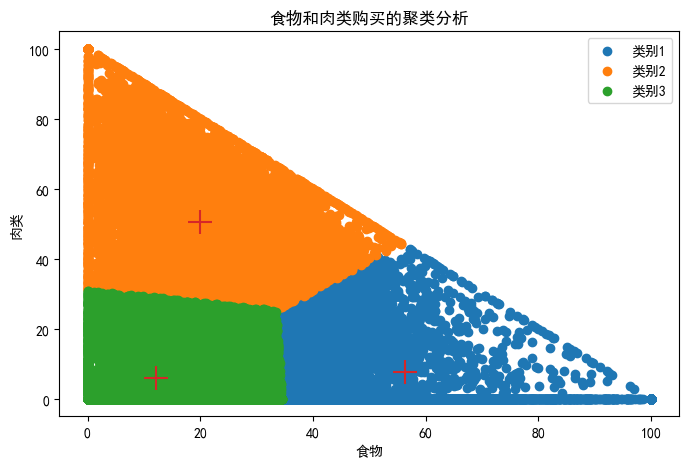

In [15]:
plt.figure(figsize = (8,5))
plt.scatter(t2[kmeans.labels == 0].iloc[:,0], t2[kmeans.labels == 0].iloc[:,1], label = '类别1')
plt.scatter(t2[kmeans.labels == 1].iloc[:,0], t2[kmeans.labels == 1].iloc[:,1], label = '类别2')
plt.scatter(t2[kmeans.labels == 2].iloc[:,0], t2[kmeans.labels == 2].iloc[:,1], label = '类别3')
plt.scatter(kmeans.cluster_centers[:,0], kmeans.cluster_centers[:,1], marker = "+", s=300)
plt.title('食物和肉类购买的聚类分析')
plt.xlabel('食物')
plt.ylabel('肉类')
plt.legend()
plt.show()